In [315]:
import os
from tensorflow.keras import layers, models
import numpy as np
from collections import Counter
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Model, model_from_json
from tensorflow.keras.layers import Input, Lambda
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.models import model_from_json
import warnings
warnings.filterwarnings("ignore")

In [50]:
train_dir = r'C:\Users\srida\Downloads\Images_CNN\train'
test_dir = r'C:\Users\srida\Downloads\Images_CNN\test'

In [52]:
def get_class_counts(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

In [54]:
class_counts = get_class_counts(train_dir)
sorted_classes = sorted(class_counts, key=class_counts.get, reverse=True)

In [56]:
top_101_classes = sorted_classes[:101]
least_36_classes = sorted_classes[101:]

In [58]:
split_1 = top_101_classes[:25]
split_2 = top_101_classes[25:50]
split_3 = top_101_classes[50:75]
split_4 = top_101_classes[75:101]

In [60]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [307]:
#train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,
#    horizontal_flip=True,fill_mode='nearest')
#test_datagen = ImageDataGenerator(rescale=1./255,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,
#    horizontal_flip=True,fill_mode='nearest')

In [62]:
def create_generators(train_dir, test_dir, classes, batch_size=32, target_size=(150, 150)):
    train_gen = train_datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        classes=classes,
        class_mode='categorical'
    )
    test_gen = test_datagen.flow_from_directory(
        test_dir,
        target_size=target_size,
        batch_size=batch_size,
        classes=classes,
        class_mode='categorical'
    )
    return train_gen, test_gen

#### VGG16 model

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Function to create a VGG16-based CNN model
def create_vgg16_model(num_classes, input_shape=(150, 150, 3)):
    # Load the VGG16 model with pre-trained ImageNet weights, excluding the top layers
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Freeze the VGG16 base model to prevent its weights from being updated during training
    base_model.trainable = False

    # Build the model
    model = models.Sequential([
        base_model,                             # Add the base VGG16 model
        layers.Flatten(),                       # Flatten the output layer for the fully connected layers
        layers.Dense(256, activation='relu'),   # Add a fully connected dense layer with 256 neurons and ReLU activation
        layers.Dropout(0.2),                    # Add dropout for regularization to reduce overfitting
        layers.Dense(num_classes, activation='softmax')  # Output layer with 'softmax' activation for classification
    ])

    # Compile the model with Adam optimizer, categorical crossentropy loss (for multiclass classification), and accuracy metric
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Create and train the model
model_vgg16_1 = create_vgg16_model(num_classes=len(split_1))  # Initialize the model for a specific split (split_1)
model_vgg16_1.fit(train_gen_1, epochs=15, validation_data=test_gen_1)  # Train the model for 15 epochs with training and validation generators

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 1976s 3s/step - accuracy: 0.2020 - loss: 2.7905 - val_accuracy: 0.4032 - val_loss: 2.0575
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 619s 990ms/step - accuracy: 0.4095 - loss: 1.9813 - val_accuracy: 0.4514 - val_loss: 1.8846
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 525s 840ms/step - accuracy: 0.4880 - loss: 1.7168 - val_accuracy: 0.4410 - val_loss: 1.9192
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 522s 835ms/step - accuracy: 0.5230 - loss: 1.5674 - val_accuracy: 0.4540 - val_loss: 1.8585
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 521s 832ms/step - accuracy: 0.5640 - loss: 1.4138 - val_accuracy: 0.4458 - val_loss: 1.9110
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 521s 832ms/step - accuracy: 0.6002 - loss: 1.2974 - val_accuracy: 0.4460 - val_loss: 1.9274
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 522s 834ms/step - accuracy: 0.6346 - loss: 1.1650 - val_accuracy: 0.4564 - val_loss: 1.9495
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 522s 834ms/step - accuracy: 0.6595 - l

In [72]:
model_vgg16_2 = create_vgg16_model(num_classes=len(split_2))
model_vgg16_2.fit(train_gen_2, epochs=15, validation_data=test_gen_2)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 554s 883ms/step - accuracy: 0.2877 - loss: 2.5037 - val_accuracy: 0.4798 - val_loss: 1.7934
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 555s 887ms/step - accuracy: 0.5054 - loss: 1.6517 - val_accuracy: 0.5234 - val_loss: 1.6039
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 531s 849ms/step - accuracy: 0.5762 - loss: 1.4004 - val_accuracy: 0.5184 - val_loss: 1.6185
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 520s 832ms/step - accuracy: 0.6212 - loss: 1.2372 - val_accuracy: 0.5458 - val_loss: 1.5930
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 522s 835ms/step - accuracy: 0.6652 - loss: 1.0841 - val_accuracy: 0.5388 - val_loss: 1.6275
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 523s 836ms/step - accuracy: 0.6999 - loss: 0.9422 - val_accuracy: 0.5408 - val_loss: 1.6514
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 525s 840ms/step - accuracy: 0.7348 - loss: 0.8345 - val_accuracy: 0.5252 - val_loss: 1.7689
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 521s 833ms/step - accuracy: 0.7690 -

In [74]:
model_vgg16_3 = create_vgg16_model(num_classes=len(split_3))
model_vgg16_3.fit(train_gen_3, epochs=15, validation_data=test_gen_3)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 568s 903ms/step - accuracy: 0.2912 - loss: 2.4653 - val_accuracy: 0.4754 - val_loss: 1.8092
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 542s 867ms/step - accuracy: 0.5114 - loss: 1.6428 - val_accuracy: 0.5202 - val_loss: 1.6575
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 538s 860ms/step - accuracy: 0.5796 - loss: 1.3934 - val_accuracy: 0.5224 - val_loss: 1.6203
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 536s 858ms/step - accuracy: 0.6387 - loss: 1.1923 - val_accuracy: 0.5320 - val_loss: 1.6383
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 535s 856ms/step - accuracy: 0.6763 - loss: 1.0519 - val_accuracy: 0.5308 - val_loss: 1.6740
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 537s 858ms/step - accuracy: 0.7161 - loss: 0.9216 - val_accuracy: 0.5390 - val_loss: 1.7328
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 538s 861ms/step - accuracy: 0.7556 - loss: 0.7699 - val_accuracy: 0.5322 - val_loss: 1.7251
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 543s 868ms/step - accuracy: 0.7772 -

In [75]:
model_vgg16_4 = create_vgg16_model(num_classes=len(split_4))
model_vgg16_4.fit(train_gen_4, epochs=15, validation_data=test_gen_4)

Epoch 1/15
650/650 ━━━━━━━━━━━━━━━━━━━━ 645s 987ms/step - accuracy: 0.2356 - loss: 2.6640 - val_accuracy: 0.4285 - val_loss: 1.9190
Epoch 2/15
650/650 ━━━━━━━━━━━━━━━━━━━━ 622s 956ms/step - accuracy: 0.4581 - loss: 1.8279 - val_accuracy: 0.4871 - val_loss: 1.7350
Epoch 3/15
650/650 ━━━━━━━━━━━━━━━━━━━━ 612s 941ms/step - accuracy: 0.5174 - loss: 1.5811 - val_accuracy: 0.4967 - val_loss: 1.7120
Epoch 4/15
650/650 ━━━━━━━━━━━━━━━━━━━━ 587s 902ms/step - accuracy: 0.5633 - loss: 1.4226 - val_accuracy: 0.5038 - val_loss: 1.6654
Epoch 5/15
650/650 ━━━━━━━━━━━━━━━━━━━━ 628s 966ms/step - accuracy: 0.6011 - loss: 1.2862 - val_accuracy: 0.4973 - val_loss: 1.7391
Epoch 6/15
650/650 ━━━━━━━━━━━━━━━━━━━━ 634s 974ms/step - accuracy: 0.6340 - loss: 1.1715 - val_accuracy: 0.5092 - val_loss: 1.7057
Epoch 7/15
650/650 ━━━━━━━━━━━━━━━━━━━━ 632s 971ms/step - accuracy: 0.6687 - loss: 1.0638 - val_accuracy: 0.5092 - val_loss: 1.7393
Epoch 8/15
650/650 ━━━━━━━━━━━━━━━━━━━━ 624s 959ms/step - accuracy: 0.6992 -

In [77]:
model_vgg16_5 = create_vgg16_model(num_classes=len(least_36_classes))
model_vgg16_5.fit(train_gen_5, epochs=15, validation_data=test_gen_5)

Epoch 1/15
 3/78 ━━━━━━━━━━━━━━━━━━━━ 2:09 2s/step - accuracy: 0.0278 - loss: 3.9584     

C:\Users\srida\Anaconda\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


78/78 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.1761 - loss: 3.2621 - val_accuracy: 0.4710 - val_loss: 2.0176
Epoch 2/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.5535 - loss: 1.5655 - val_accuracy: 0.5306 - val_loss: 1.6313
Epoch 3/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.7444 - loss: 0.9458 - val_accuracy: 0.5714 - val_loss: 1.4900
Epoch 4/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.8597 - loss: 0.5758 - val_accuracy: 0.5903 - val_loss: 1.5025
Epoch 5/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.8877 - loss: 0.4363 - val_accuracy: 0.5746 - val_loss: 1.5030
Epoch 6/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.9404 - loss: 0.2731 - val_accuracy: 0.5746 - val_loss: 1.4898
Epoch 7/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.9544 - loss: 0.2118 - val_accuracy: 0.5918 - val_loss: 1.4762
Epoch 8/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.9791 - loss: 0.1356 - val_accuracy: 0.5918 - val_loss: 1.

In [303]:
for i, model in enumerate(models, 1):
    model_json = model.to_json()
    with open(f"model_vgg16_{i}.json", "w") as json_file:
        json_file.write(model_json)
    
    model.save_weights(f"model_vgg16_{i}.weights.h5")

print("All models saved as .weights.h5 and .json files.")

All models saved as .weights.h5 and .json files.


In [305]:
# Save each model as a complete .h5 file
for i, model in enumerate(models, 1):
    # Save the complete model (architecture + weights) in one file
    model.save(f"model_vgg16_{i}.h5")

print("All models saved as complete .h5 files.")

All models saved as complete .h5 files.


In [309]:
def load_models():
    loaded_models = []
    for i in range(1, 6):
        # Load model architecture
        with open(f"model_vgg16_{i}.json", "r") as json_file:
            model_json = json_file.read()
        model = model_from_json(model_json)
        
        # Load model weights
        model.load_weights(f"model_vgg16_{i}.h5")
        loaded_models.append(model)
    
    return loaded_models

In [311]:
def ensemble_predict(image_input):
    # Load the saved models
    models = load_models()
    
    predictions = []
    for model in models:
        pred = model.predict(image_input)
        predictions.append(pred)
    
    confidence_scores = [np.max(pred) for pred in predictions]
    best_model_idx = np.argmax(confidence_scores)
    best_prediction = predictions[best_model_idx]
    
    predicted_class = np.argmax(best_prediction)
    
    return predicted_class

In [313]:
with open("model.pkl", "wb") as f:
    pickle.dump(ensemble_predict, f)

print("Ensemble model function saved as 'model.pkl'")

Ensemble model function saved as 'model.pkl'


In [106]:
model_paths = [
    ("saved_models/model_vgg16_1.json", "saved_models/model_vgg16_1.h5"),
    ("saved_models/model_vgg16_2.json", "saved_models/model_vgg16_2.h5"),
    ("saved_models/model_vgg16_3.json", "saved_models/model_vgg16_3.h5"),
    ("saved_models/model_vgg16_4.json", "saved_models/model_vgg16_4.h5"),
    ("saved_models/model_vgg16_5.json", "saved_models/model_vgg16_5.h5"),
]

In [317]:
def load_model(json_path, weights_path):
    with open(json_path, "r") as json_file:
        model_json = json_file.read()
    model = model_from_json(model_json)
    model.load_weights(weights_path)
    return model

In [319]:
model_paths = [
    ("model_vgg16_1.json", "model_vgg16_1.h5"),("model_vgg16_2.json", "model_vgg16_2.h5"),("model_vgg16_3.json", "model_vgg16_3.h5"),
    ("model_vgg16_4.json", "model_vgg16_4.h5"),("model_vgg16_5.json", "model_vgg16_5.h5")]

In [321]:
models = [load_model(json_path, weights_path) for json_path, weights_path in model_paths]

In [323]:
input_shape = models[0].input_shape[1:]
ensemble_input = Input(shape=input_shape)

In [325]:
model_outputs = [model(ensemble_input) for model in models]

In [327]:
def select_best_output(outputs):
    stacked_outputs = tf.stack(outputs, axis=0)  # Shape: (num_models, batch_size, num_classes)
    max_confidences = tf.reduce_max(stacked_outputs, axis=-1)  # Max confidence for each model
    best_model_idx = tf.argmax(max_confidences, axis=0)  # Best model per sample
    best_outputs = tf.gather(stacked_outputs, best_model_idx, axis=0, batch_dims=1)
    return best_outputs

In [329]:
ensemble_output = Lambda(select_best_output, output_shape=(max([output.shape[-1] for output in model_outputs]),))(model_outputs)

In [331]:
ensemble_model = Model(inputs=ensemble_input, outputs=ensemble_output)

In [333]:
ensemble_model.save("model.h5")
print("Combined ensemble model saved as 'model.h5'")

Combined ensemble model saved as 'model.h5'


In [335]:
import json

# List to store the JSON structures of each model
models_json = []

# Iterate through each model and save its structure to the list
for i, model in enumerate(models, 1):
    model_json = model.to_json()
    models_json.append(model_json)

# Save the combined list of models' JSON structures to a single file named model.json
with open("model.json", "w") as json_file:
    json.dump(models_json, json_file)

print("All models' structures saved as model.json.")

All models' structures saved as model.json.


In [424]:
class_names = [
    "apple_pie", "baby_back_ribs", "baklava", "beef_carpaccio", "beef_tartare",
    "beet_salad", "beignets", "bibimbap", "bread_pudding", "breakfast_burrito",
    "bruschetta", "caesar_salad", "cannoli", "caprese_salad", "carrot_cake",
    "ceviche", "cheesecake", "cheese_plate", "chicken_curry", "chicken_quesadilla",
    "chicken_wings", "chocolate_cake", "chocolate_mousse", "churros", "clam_chowder"]

In [426]:
def preprocess_image(img_path, target_size=(150, 150)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

In [428]:
def predict_image_class(model, img_array):
    prediction = model.predict(img_array)
    predicted_class_idx = np.argmax(prediction, axis=1)[0]
    predicted_class = class_names[predicted_class_idx]
    return predicted_class, prediction

In [430]:
def draw_prediction_on_image(img_path, predicted_class):
    img = cv2.imread(img_path)
    h, w, _ = img.shape
    cv2.rectangle(img, (10, 10), (w-10, h-10), (0, 255, 0), 3)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, predicted_class, (10, 30), font, 1, (0, 255, 0), 2, cv2.LINE_AA)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [432]:
img_path = r"C:\Users\srida\Downloads\Images_CNN\train\beet_salad\75494.jpg"

In [434]:
img_array = preprocess_image(img_path)

In [436]:
predicted_class, prediction = predict_image_class(model_vgg16_3, img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


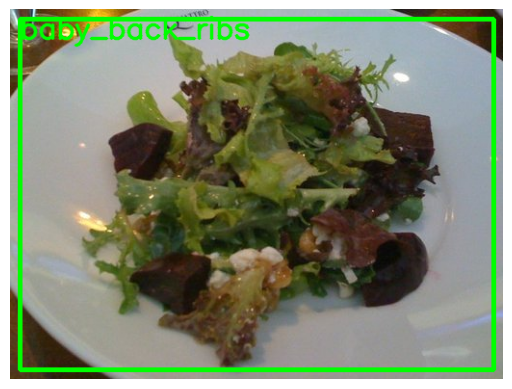

In [451]:
draw_prediction_on_image(img_path, predicted_class)

#### CNN

In [ ]:
from tensorflow.keras import layers, models

# Function to create a custom CNN model for image classification
def create_model(num_classes, input_shape=(150, 150, 3)):
    model = models.Sequential([
        # First convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        # Max pooling layer to reduce spatial dimensions
        layers.MaxPooling2D((2, 2)),
        # Dropout for regularization, preventing overfitting
        layers.Dropout(0.05),
        
        # Second convolutional layer with 64 filters and 3x3 kernel size
        layers.Conv2D(64, (3, 3), activation='relu'),
        # Max pooling layer
        layers.MaxPooling2D((2, 2)),
        # Additional dropout layer
        layers.Dropout(0.05),
        
        # Third convolutional layer with 128 filters and 3x3 kernel size
        layers.Conv2D(128, (3, 3), activation='relu'),
        # Max pooling layer
        layers.MaxPooling2D((2, 2)),
        # Dropout layer to further prevent overfitting
        layers.Dropout(0.05),
        
        # Flatten the 3D feature maps into 1D feature vectors for the dense layers
        layers.Flatten(),
        # Fully connected dense layer with 128 neurons and ReLU activation
        layers.Dense(128, activation='relu'),
        # Dropout layer before the output layer
        layers.Dropout(0.05),
        
        # Output layer with 'softmax' activation for multiclass classification
        layers.Dense(num_classes, activation='softmax')
    ])
    
    # Compile the model with Adam optimizer, categorical cross-entropy loss (for multiclass classification), and accuracy as a metric
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [154]:
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

def create_regularized_model(num_classes, input_shape=(150, 150, 3)):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.05),  # Changed dropout to 0.05
        layers.Dense(num_classes, activation='softmax')
    ])
    
    # Compile the model with Adam optimizer and categorical crossentropy loss
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Callback for reducing learning rate when validation accuracy doesn't improve
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, min_lr=1e-6)

In [159]:
batch_size = 32
target_size = (150, 150)

In [161]:
train_gen_1, test_gen_1 = create_generators(train_dir, test_dir, split_1, batch_size, target_size)
model_1 = create_regularized_model(len(split_1))

Found 20000 images belonging to 25 classes.
Found 5000 images belonging to 25 classes.


In [163]:
print("Class labels for train_gen_1:")
print(train_gen_1.class_indices)

print("Class labels for test_gen_1:")
print(test_gen_1.class_indices)

Class labels for train_gen_1:
{'apple_pie': 0, 'baby_back_ribs': 1, 'baklava': 2, 'beef_carpaccio': 3, 'beef_tartare': 4, 'beet_salad': 5, 'beignets': 6, 'bibimbap': 7, 'bread_pudding': 8, 'breakfast_burrito': 9, 'bruschetta': 10, 'caesar_salad': 11, 'cannoli': 12, 'caprese_salad': 13, 'carrot_cake': 14, 'ceviche': 15, 'cheesecake': 16, 'cheese_plate': 17, 'chicken_curry': 18, 'chicken_quesadilla': 19, 'chicken_wings': 20, 'chocolate_cake': 21, 'chocolate_mousse': 22, 'churros': 23, 'clam_chowder': 24}
Class labels for test_gen_1:
{'apple_pie': 0, 'baby_back_ribs': 1, 'baklava': 2, 'beef_carpaccio': 3, 'beef_tartare': 4, 'beet_salad': 5, 'beignets': 6, 'bibimbap': 7, 'bread_pudding': 8, 'breakfast_burrito': 9, 'bruschetta': 10, 'caesar_salad': 11, 'cannoli': 12, 'caprese_salad': 13, 'carrot_cake': 14, 'ceviche': 15, 'cheesecake': 16, 'cheese_plate': 17, 'chicken_curry': 18, 'chicken_quesadilla': 19, 'chicken_wings': 20, 'chocolate_cake': 21, 'chocolate_mousse': 22, 'churros': 23, 'clam

In [165]:
import numpy as np
from collections import Counter

def print_image_counts_per_label(generator, name=""):
    # Count occurrences of each class index in the generator
    class_counts = dict(Counter(generator.classes))
    
    # Map counts back to class labels
    label_counts = {label: class_counts[idx] for label, idx in generator.class_indices.items()}
    
    # Print results
    print(f"Image counts for each label in {name}:")
    for label, count in label_counts.items():
        print(f"{label}: {count}")

print_image_counts_per_label(train_gen_1, "train_gen_1")
print_image_counts_per_label(test_gen_1, "test_gen_1")

Image counts for each label in train_gen_1:
apple_pie: 800
baby_back_ribs: 800
baklava: 800
beef_carpaccio: 800
beef_tartare: 800
beet_salad: 800
beignets: 800
bibimbap: 800
bread_pudding: 800
breakfast_burrito: 800
bruschetta: 800
caesar_salad: 800
cannoli: 800
caprese_salad: 800
carrot_cake: 800
ceviche: 800
cheesecake: 800
cheese_plate: 800
chicken_curry: 800
chicken_quesadilla: 800
chicken_wings: 800
chocolate_cake: 800
chocolate_mousse: 800
churros: 800
clam_chowder: 800
Image counts for each label in test_gen_1:
apple_pie: 200
baby_back_ribs: 200
baklava: 200
beef_carpaccio: 200
beef_tartare: 200
beet_salad: 200
beignets: 200
bibimbap: 200
bread_pudding: 200
breakfast_burrito: 200
bruschetta: 200
caesar_salad: 200
cannoli: 200
caprese_salad: 200
carrot_cake: 200
ceviche: 200
cheesecake: 200
cheese_plate: 200
chicken_curry: 200
chicken_quesadilla: 200
chicken_wings: 200
chocolate_cake: 200
chocolate_mousse: 200
churros: 200
clam_chowder: 200


In [167]:
train_gen_2, test_gen_2 = create_generators(train_dir, test_dir, split_2, batch_size, target_size)
model_2 = create_regularized_model(len(split_2))

Found 20000 images belonging to 25 classes.
Found 5000 images belonging to 25 classes.


In [169]:
train_gen_3, test_gen_3 = create_generators(train_dir, test_dir, split_3, batch_size, target_size)
model_3 = create_regularized_model(len(split_3))

Found 20000 images belonging to 25 classes.
Found 5000 images belonging to 25 classes.


In [171]:
train_gen_4, test_gen_4 = create_generators(train_dir, test_dir, split_4, batch_size, target_size)
model_4 = create_regularized_model(len(split_4))

Found 20800 images belonging to 26 classes.
Found 5200 images belonging to 26 classes.


In [173]:
train_gen_5, test_gen_5 = create_generators(train_dir, test_dir, least_36_classes, batch_size, target_size)
model_5 = create_regularized_model(len(least_36_classes))

Found 2478 images belonging to 36 classes.
Found 637 images belonging to 36 classes.


In [175]:
epochs = 15
model_1.fit(train_gen_1, epochs=epochs, validation_data=test_gen_1)

Epoch 1/15


C:\Users\srida\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 260s 410ms/step - accuracy: 0.0900 - loss: 3.9100 - val_accuracy: 0.2030 - val_loss: 2.8936
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 199ms/step - accuracy: 0.2169 - loss: 2.8257 - val_accuracy: 0.2490 - val_loss: 2.7288
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 120s 191ms/step - accuracy: 0.2498 - loss: 2.7110 - val_accuracy: 0.2496 - val_loss: 2.6844
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 116s 185ms/step - accuracy: 0.2741 - loss: 2.6201 - val_accuracy: 0.2694 - val_loss: 2.6645
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 120s 191ms/step - accuracy: 0.2971 - loss: 2.5566 - val_accuracy: 0.2848 - val_loss: 2.6232
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 149s 237ms/step - accuracy: 0.3245 - loss: 2.4598 - val_accuracy: 0.2976 - val_loss: 2.6128
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 119s 189ms/step - accuracy: 0.3510 - loss: 2.3907 - val_accuracy: 0.3076 - val_loss: 2.5834
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 117s 186ms/step - accuracy: 0.3881 - loss: 2.30

In [176]:
epochs = 15
model_2.fit(train_gen_2, epochs=epochs, validation_data=test_gen_2)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 240s 377ms/step - accuracy: 0.0841 - loss: 3.9343 - val_accuracy: 0.2128 - val_loss: 2.8621
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 118s 187ms/step - accuracy: 0.2097 - loss: 2.8302 - val_accuracy: 0.2346 - val_loss: 2.7614
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 117s 187ms/step - accuracy: 0.2494 - loss: 2.7154 - val_accuracy: 0.2716 - val_loss: 2.6914
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 117s 187ms/step - accuracy: 0.2829 - loss: 2.6280 - val_accuracy: 0.2752 - val_loss: 2.6627
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 117s 186ms/step - accuracy: 0.3152 - loss: 2.5449 - val_accuracy: 0.2866 - val_loss: 2.6274
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 117s 187ms/step - accuracy: 0.3465 - loss: 2.4452 - val_accuracy: 0.2880 - val_loss: 2.6530
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 117s 186ms/step - accuracy: 0.3741 - loss: 2.3700 - val_accuracy: 0.3196 - val_loss: 2.5988
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 116s 185ms/step - accuracy: 0.4073 -

In [177]:
epochs = 15
model_3.fit(train_gen_3, epochs=epochs, validation_data=test_gen_3)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 238s 376ms/step - accuracy: 0.0846 - loss: 3.8797 - val_accuracy: 0.2066 - val_loss: 2.9005
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 117s 186ms/step - accuracy: 0.2205 - loss: 2.8324 - val_accuracy: 0.2610 - val_loss: 2.7325
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 117s 186ms/step - accuracy: 0.2758 - loss: 2.6760 - val_accuracy: 0.2872 - val_loss: 2.6680
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 124s 198ms/step - accuracy: 0.3075 - loss: 2.5746 - val_accuracy: 0.3010 - val_loss: 2.6171
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 160s 255ms/step - accuracy: 0.3368 - loss: 2.4930 - val_accuracy: 0.3108 - val_loss: 2.6056
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 217s 345ms/step - accuracy: 0.3632 - loss: 2.4095 - val_accuracy: 0.3114 - val_loss: 2.6231
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 123s 195ms/step - accuracy: 0.3914 - loss: 2.3288 - val_accuracy: 0.3180 - val_loss: 2.5657
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 199ms/step - accuracy: 0.4178 -

In [178]:
epochs = 15
model_4.fit(train_gen_4, epochs=epochs, validation_data=test_gen_4)

Epoch 1/15
650/650 ━━━━━━━━━━━━━━━━━━━━ 252s 383ms/step - accuracy: 0.0830 - loss: 3.9494 - val_accuracy: 0.1798 - val_loss: 2.9605
Epoch 2/15
650/650 ━━━━━━━━━━━━━━━━━━━━ 123s 188ms/step - accuracy: 0.2007 - loss: 2.8706 - val_accuracy: 0.2521 - val_loss: 2.7208
Epoch 3/15
650/650 ━━━━━━━━━━━━━━━━━━━━ 122s 188ms/step - accuracy: 0.2597 - loss: 2.6949 - val_accuracy: 0.2731 - val_loss: 2.6616
Epoch 4/15
650/650 ━━━━━━━━━━━━━━━━━━━━ 122s 188ms/step - accuracy: 0.2872 - loss: 2.5924 - val_accuracy: 0.2971 - val_loss: 2.5845
Epoch 5/15
650/650 ━━━━━━━━━━━━━━━━━━━━ 122s 187ms/step - accuracy: 0.3273 - loss: 2.5001 - val_accuracy: 0.3115 - val_loss: 2.5616
Epoch 6/15
650/650 ━━━━━━━━━━━━━━━━━━━━ 122s 188ms/step - accuracy: 0.3523 - loss: 2.4066 - val_accuracy: 0.3060 - val_loss: 2.5592
Epoch 7/15
650/650 ━━━━━━━━━━━━━━━━━━━━ 123s 188ms/step - accuracy: 0.3817 - loss: 2.3149 - val_accuracy: 0.3173 - val_loss: 2.5690
Epoch 8/15
650/650 ━━━━━━━━━━━━━━━━━━━━ 122s 188ms/step - accuracy: 0.4059 -

In [179]:
epochs = 15
model_5.fit(train_gen_5, epochs=epochs, validation_data=test_gen_5)

C:\Users\srida\Anaconda\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.0384 - loss: 5.5404 - val_accuracy: 0.0612 - val_loss: 4.2777
Epoch 2/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 83s 980ms/step - accuracy: 0.0855 - loss: 4.0615 - val_accuracy: 0.1240 - val_loss: 3.5675
Epoch 3/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.1588 - loss: 3.4303 - val_accuracy: 0.2151 - val_loss: 3.1765
Epoch 4/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 82s 984ms/step - accuracy: 0.2211 - loss: 3.0510 - val_accuracy: 0.2653 - val_loss: 2.8534
Epoch 5/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 82s 994ms/step - accuracy: 0.3108 - loss: 2.7386 - val_accuracy: 0.2826 - val_loss: 2.7021
Epoch 6/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 82s 969ms/step - accuracy: 0.3668 - loss: 2.4682 - val_accuracy: 0.2826 - val_loss: 2.7223
Epoch 7/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 82s 975ms/step - accuracy: 0.3943 - loss: 2.3989 - val_accuracy: 0.3501 - val_loss: 2.5360
Epoch 8/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 82s 980ms/step - accuracy: 0.4712 - loss: 2.0904 - val_accuracy:

In [192]:
import numpy as np
import pickle

# List of preloaded models and their output classes
models = [model_1, model_2, model_3, model_4, model_5]
model_classes = [25, 25, 26, 25, 36]  # Adjust based on your actual model classes

def predict_with_model_selection(image):
    # Get predictions from each model
    predictions = [model.predict(image) for model in models]
    
    # Find the model with the highest confidence score for the top prediction
    max_confidences = [np.max(pred) for pred in predictions]
    selected_model_idx = np.argmax(max_confidences)
    
    # Return prediction from the selected model
    return predictions[selected_model_idx]

# Example of using the function
# Assuming `sample_image` is a preprocessed image for prediction
# sample_image = ... # Your preprocessing code here
# prediction = predict_with_model_selection(sample_image)

# Save the prediction function as a pickle file for use
with open("CNN_model1.pkl", "wb") as file:
    pickle.dump(predict_with_model_selection, file)

print("Model selection ensemble saved as CNN_model1.pkl")

Model selection ensemble saved as CNN_model1.pkl
